<a href="https://colab.research.google.com/github/victorknox/rude-mood/blob/main/Rude_Mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

# Phase-1: Efficiency of the Politeness Classifier

In [11]:
import pandas as pd
classifier_data = pd.read_csv('classified_comments.csv')
print(classifier_data.head())

                                                text  prediction     score
0  If you're on AMD turn on FTPM in the bios on y...           0  0.331031
1  Y'all just raw dogging a beta OS on your main ...           0  0.270393
2  Be sure to check out our other subreddit /r/Wi...           0  0.217292
3  You do not need TPM to clean install, but the ...           0  0.230732
4  Well I'm screwed need a new Motherboard and CP...           0  0.322701


In [12]:
annotated_data = pd.read_csv('annotated_comments.csv')
print(annotated_data.head())

                                               title  ... politeness score
0  If you want to run the Windows 11 build native...  ...              1.0
1  If you want to run the Windows 11 build native...  ...              0.0
2  If you want to run the Windows 11 build native...  ...              2.0
3  If you want to run the Windows 11 build native...  ...              1.0
4  If you want to run the Windows 11 build native...  ...             -1.0

[5 rows x 6 columns]


In [13]:
body1 = classifier_data["text"]
body2 = annotated_data["body"]
scores1 = classifier_data["prediction"]
scores2 = annotated_data["politeness score"]

In [14]:
print(len(body1), len(body2))

157 169


In [25]:
count = 0
correct = 0
for i in range(len(body1)):
  for j in range(len(body2)):
    if(body1[i] == body2[j] and (scores1[i] - scores2[j]) > -10):
      if(scores2[j] >= 0 and scores1[i] == 0):
        correct += 1
      elif(scores2[j] <= 0 and scores1[i] == 1):
        correct += 1
      count += 1

print(correct, count)
print("Accuracy = ", end =" " )
print(correct/count)

132 158
Accuracy =  0.8354430379746836


In [ ]:
df = pd.read_csv('annotated_comments.csv')
score = df['politeness score']
x = ['-2','-1','0','1','2']
y = [0,0,0,0,0]
for i in score:
  if(i >= -2 and i<= 2):
    index=int(i)
    y[index+2]=y[index+2]+1
  
# print(x)
# print(y)
import matplotlib.pyplot as plt
plt.bar(x,y)

# Phase-2: Politeness and Group Identity

In [29]:
import pandas as pd
win_data = pd.read_csv('win_results.csv')
print(win_data.head())

                                                text  prediction     score
0  If you're on AMD turn on FTPM in the bios on y...           0  0.331031
1  Y'all just raw dogging a beta OS on your main ...           0  0.270393
2  Be sure to check out our other subreddit /r/Wi...           0  0.217292
3  You do not need TPM to clean install, but the ...           0  0.230732
4  Well I'm screwed need a new Motherboard and CP...           0  0.322701


In [28]:
lin_data = pd.read_csv('lin_results.csv')
print(lin_data.head())

                                                text  prediction     score
0  It _can_ run on most phones, but requires a lo...           0  0.280605
1  Two reasons. Most phones have locked boot load...           0  0.170371
2  Most android devices run on downstream kernels...           0  0.249747
3  Phone kernels are very far downstream from mai...           0  0.190903
4  It's more accurate to say you can run the same...           0  0.144272


In [44]:
win_scores = win_data["prediction"]
lin_scores = lin_data["prediction"]

lin_polite = 0
for i in lin_scores:
  if i == 0:
    lin_polite += 1

win_polite = 0
for i in win_scores:
  if i == 0:
    win_polite += 1

print("Linux: ")
print("Polite comments = " + str(lin_polite))
print("Impolite comments = " + str(len(lin_scores) - lin_polite))
print("Percentage of Polite comments =" + str(lin_polite/(len(lin_scores))))
print()
print("Windows: ")
print("Polite comments = " + str(win_polite))
print("Impolite comments = " + str(len(win_scores) - win_polite))
print("Percentage of Polite comments =" + str(win_polite/(len(win_scores))))

Linux: 
Polite comments = 1413
Impolite comments = 363
Percentage of Polite comments =0.7956081081081081

Windows: 
Polite comments = 1444
Impolite comments = 332
Percentage of Polite comments =0.8130630630630631


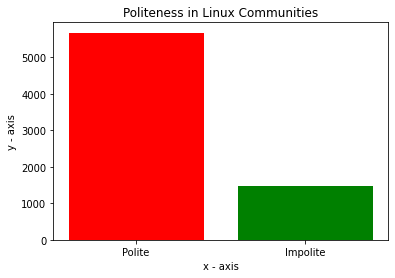

In [36]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2]
 
# heights of bars
height = [lin_polite, len(lin_scores) - lin_polite]
 
# labels for bars
tick_label = ['Polite', 'Impolite']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Politeness in Linux Communities')
 
# function to show the plot
plt.show()

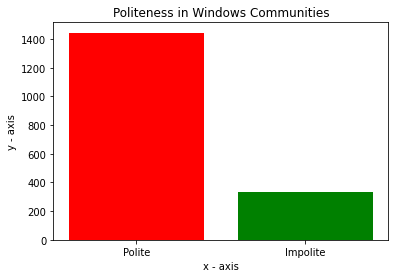

In [37]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2]
 
# heights of bars
height = [win_polite, len(win_scores) - win_polite]
 
# labels for bars
tick_label = ['Polite', 'Impolite']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Politeness in Windows Communities')
 
# function to show the plot
plt.show()

# Phase-3: Politeness and Social Status

In [ ]:
!pip install praw

In [54]:
win_data2 = pd.read_csv('win_comments.csv')
print(win_data2.head())
lin_data2 = pd.read_csv('lin_comments.csv')
print(lin_data2.head())

                                               title  ...                author
0  If you want to run the Windows 11 build native...  ...             Donkerz85
1  If you want to run the Windows 11 build native...  ...              Bleglord
2  If you want to run the Windows 11 build native...  ...         AutoModerator
3  If you want to run the Windows 11 build native...  ...  doggodoesaflipinabox
4  If you want to run the Windows 11 build native...  ...            Gasrim4003

[5 rows x 5 columns]
                                               title  ... politeness score
0  Why can Linux run on most desktops but not mos...  ...              NaN
1  Why can Linux run on most desktops but not mos...  ...              NaN
2  Why can Linux run on most desktops but not mos...  ...              NaN
3  Why can Linux run on most desktops but not mos...  ...              NaN
4  Why can Linux run on most desktops but not mos...  ...              NaN

[5 rows x 6 columns]


In [62]:
# importing the module
import praw
reddit = praw.Reddit(client_id='zlMUUUA0MNikfTR-guoZPg', client_secret='vcgEzBynk1xZHyxaHdxDJ5v67M5_DQ', user_agent='scraper')

win_comments = win_data["text"]
win_comments2 = win_data2["body"]
win_authors = win_data2["author"]

lin_comments = lin_data["text"]
lin_comments2 = lin_data2["body"]
lin_authors = lin_data2["author"]


In [ ]:
karma_list = []
for i in range(len(win_data)):
  for j in range(len(win_data2)):
    if(win_comments[i] == win_comments2[j]):
      try:
        karma = reddit.redditor(win_authors[j]).link_karma
        karma_list.append(karma)
      except:
        karma_list.append(-1)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

In [ ]:
for i in range(len(lin_data)):
  for j in range(len(lin_data2)):
    if(lin_comments[i] == lin_comments2[j]):
      try: 
        karma = reddit.redditor(lin_authors[j]).link_karma
        karma_list.append(karma)
      except:
        karma_list.append(-1)

In [ ]:
import csv
  
  
# field names 
fields = ['Karma'] 
    
# data rows of csv file 
rows = karma_list
  
with open('GFG', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(rows)

In [64]:
print(len(karma_list), len(win_comments) + len(lin_comments))

169 8940
